In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns


In [7]:
TRAIN_PATH ='data\BBC News Train.csv'
TEST_PATH = 'data\BBC News Test.csv'

In [33]:
df = pd.read_csv(TRAIN_PATH)
test_df = pd.read_csv('data\BBC News Test.csv')

In [14]:
df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


#EDA

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [15]:
df.Category.value_counts().to_frame()

,Category
sport,346
business,336
politics,274
entertainment,273
tech,261


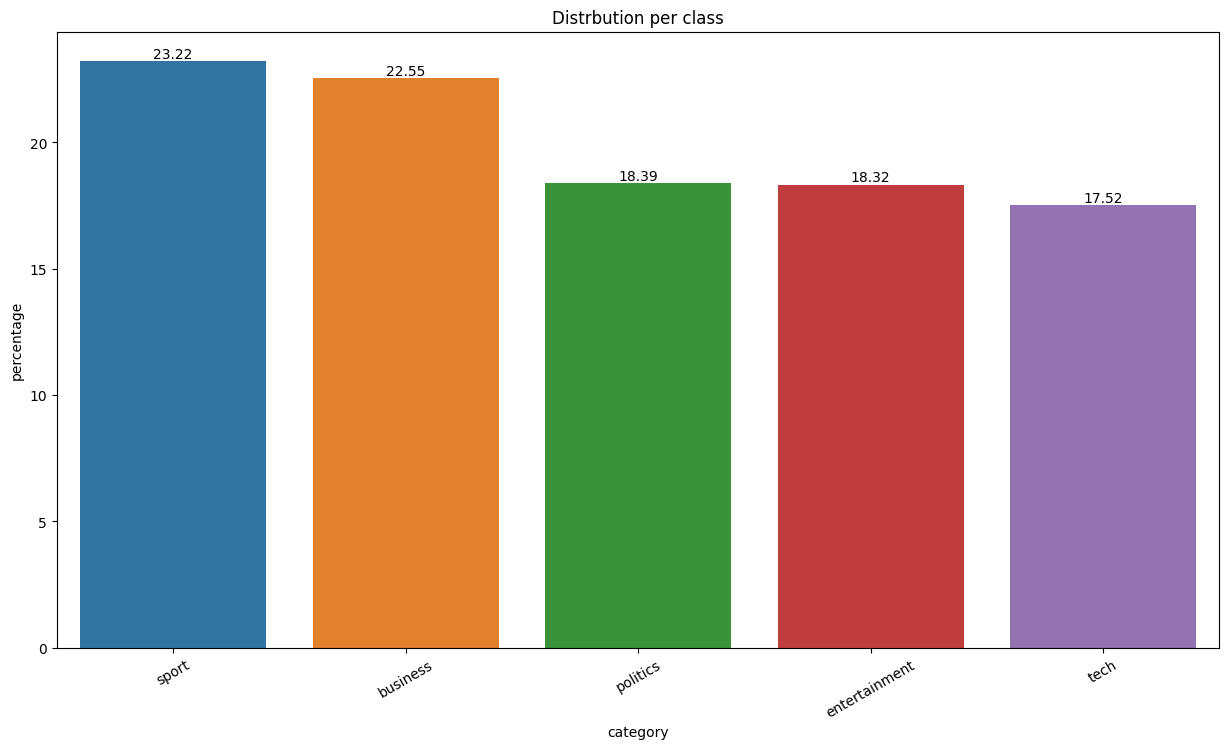

In [25]:
# Get the percentage of every class in the whole training data. 
category_percentage = (100*df.Category.value_counts()/len(df)).to_frame().reset_index()
category_percentage.columns = ['category', 'percentage']


# Visualize the output
plt.figure(figsize=(15,8))
chart = sns.barplot(x='category', y='percentage', data=category_percentage)
chart.set_title('Distrbution per class')
chart.set_xticklabels(chart.get_xticklabels(), rotation=30)

for p in chart.patches:
             chart.annotate("%0.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

- We will think more about the number of words (tokens) in every article. number of tokens will really matter espcially in deep learning approaches.

- Articles, in general, in both train and test have the same distrbution of the number of tokens. However, we can expect longer sequences in future data because the test set has some longes sequences.

In [41]:
df['#tokens'] = df['Text'].apply(lambda x : len(x.split()))
df

,ArticleId,Text,Category,#tokens
0,1833,worldcom ex-boss launches defence lawyers defe...,business,301
1,154,german business confidence slides german busin...,business,325
2,1101,bbc poll indicates economic gloom citizens in ...,business,514
3,1976,lifestyle governs mobile choice faster bett...,tech,634
4,917,enron bosses in $168m payout eighteen former e...,business,355
...,...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment,223
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment,558
1487,1590,weak dollar hits reuters revenues at media gro...,business,237
1488,1587,apple ipod family expands market apple has exp...,tech,560


<AxesSubplot: title={'center': '#tokens dist. in train'}, xlabel='#tokens'>

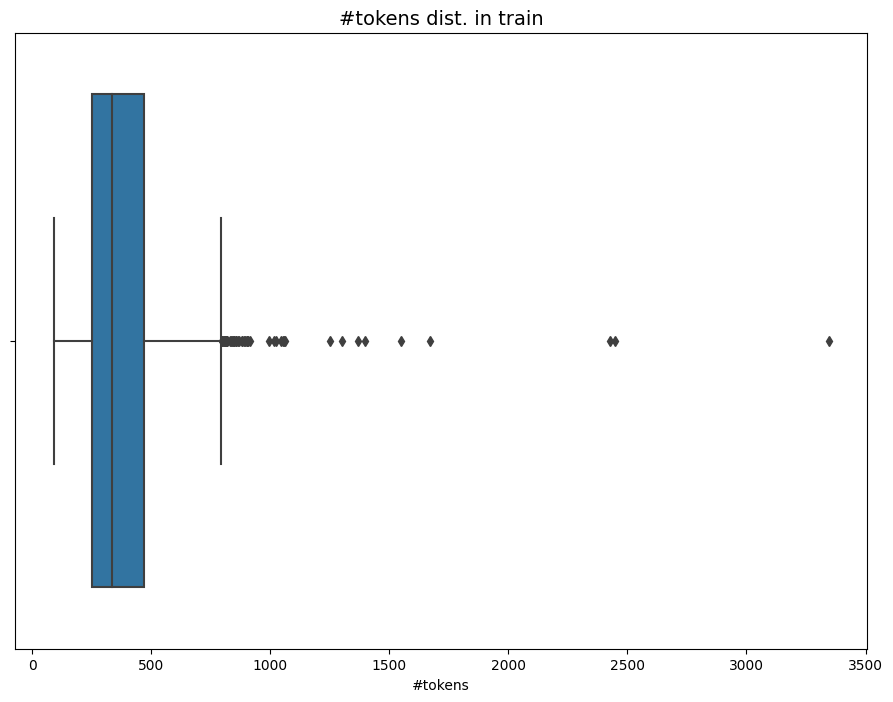

In [27]:
df['#tokens'] = df['Text'].apply(lambda x : len(x.split()))
plt.figure(figsize=(11, 8))
plt.title('Tokens dist. in training', fontdict={'fontsize':14})
sns.boxplot(data=df, x='#tokens')

In [36]:
test_df

,ArticleId,Text,#tokens
0,1018,qpr keeper day heads for preston queens park r...,156
1,1319,software watching while you work software that...,435
2,1138,d arcy injury adds to ireland woe gordon d arc...,237
3,459,india s reliance family feud heats up the ongo...,309
4,1020,boro suffer morrison injury blow middlesbrough...,135
...,...,...,...
730,1923,eu to probe alitalia state aid the european ...,286
731,373,u2 to play at grammy awards show irish rock ba...,194
732,1704,sport betting rules in spotlight a group of mp...,374
733,206,alfa romeos to get gm engines fiat is to sto...,260


<AxesSubplot: title={'center': '#tokens dist. in test'}, xlabel='#tokens'>

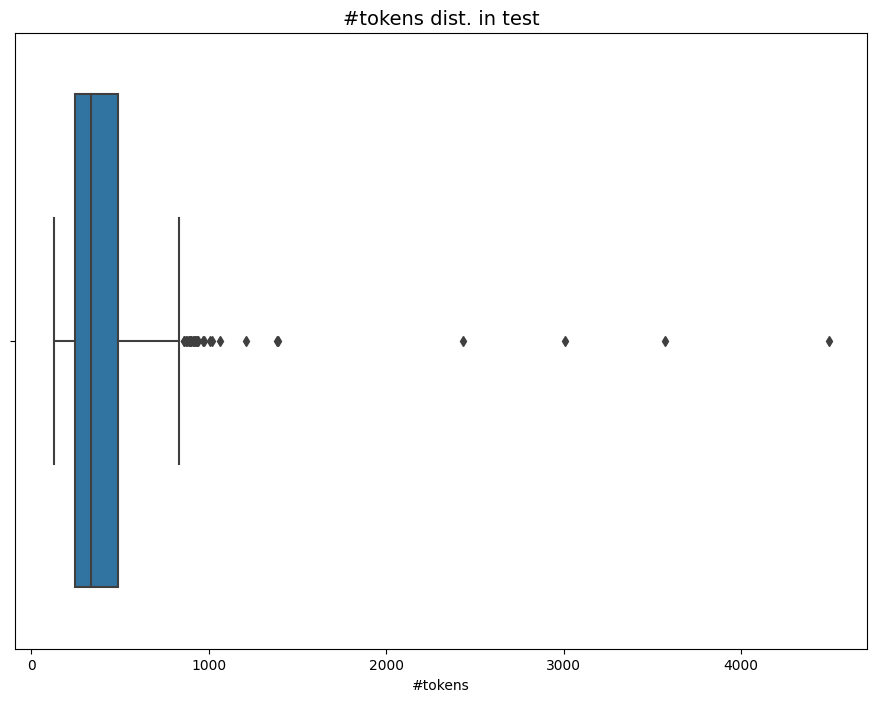

In [34]:
test_df['#tokens'] = test_df['Text'].apply(lambda x : len(x.split()))
plt.figure(figsize=(11, 8))
plt.title('#tokens dist. in test', fontdict={'fontsize':14})
sns.boxplot(data=test_df, x='#tokens')

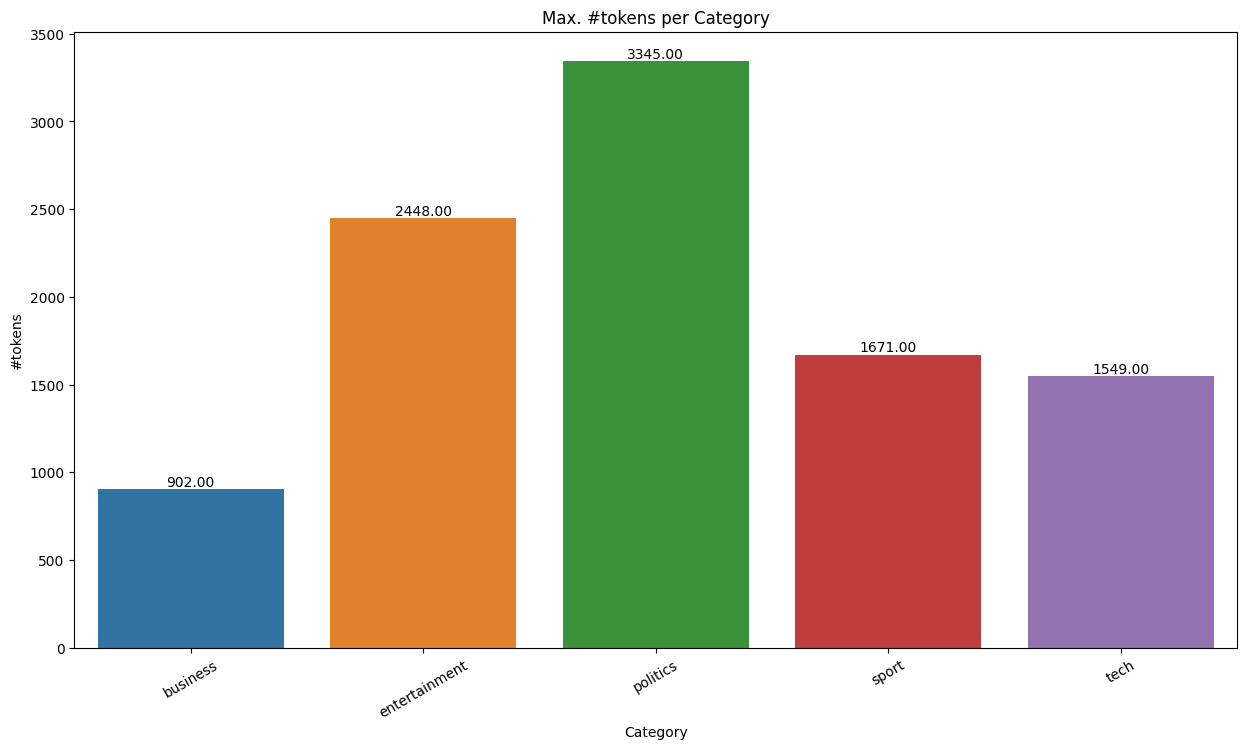

In [42]:
# Generate the summarized dataframe
max_tokens_per_cat = df.groupby('Category')['#tokens'].max().to_frame().reset_index()
# Plot the results
plt.figure(figsize=(15,8))
chart = sns.barplot(x='Category', y='#tokens', data=max_tokens_per_cat)
chart.set_title('Max. #tokens per Category')
chart.set_xticklabels(chart.get_xticklabels(), rotation=30)

for p in chart.patches:
             chart.annotate("%0.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

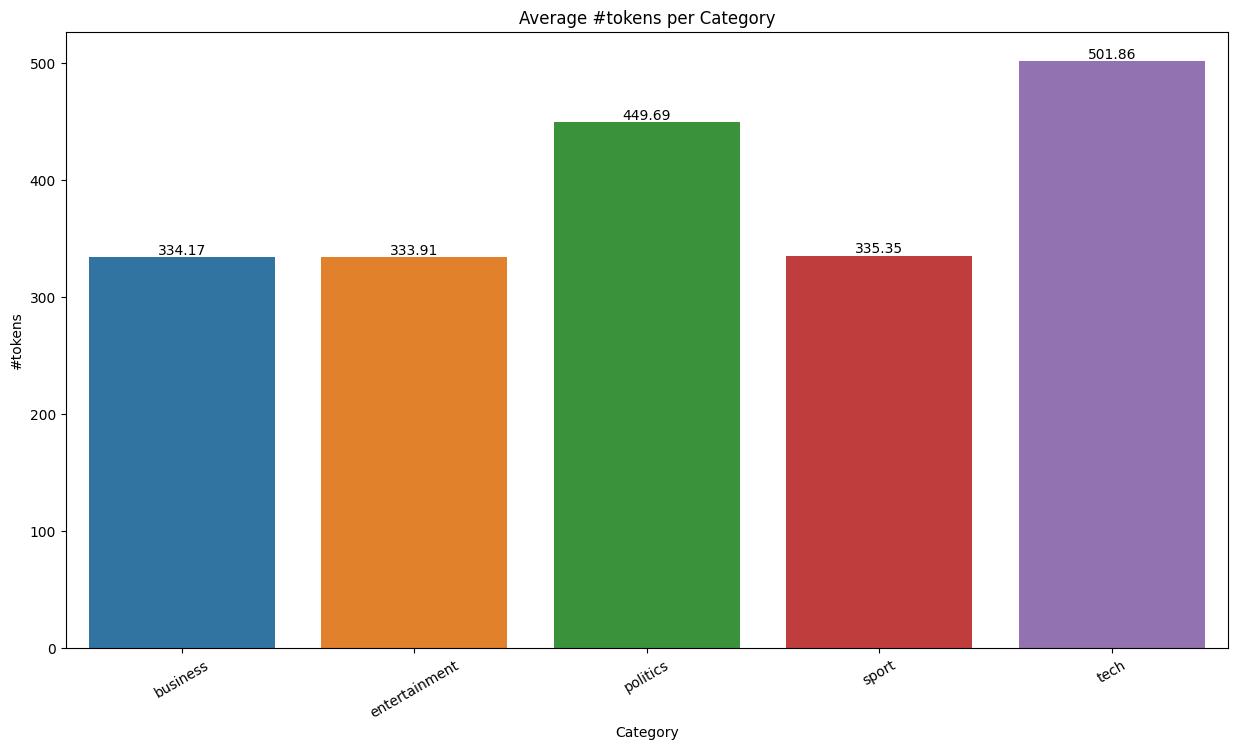

In [43]:
# Generate the summarized dataframe
avg_tokens_per_cat = df.groupby('Category')['#tokens'].mean().to_frame().reset_index()
# Plot results
plt.figure(figsize=(15,8))
chart = sns.barplot(x='Category', y='#tokens', data=avg_tokens_per_cat)
chart.set_title('Average #tokens per Category')
chart.set_xticklabels(chart.get_xticklabels(), rotation=30)

for p in chart.patches:
             chart.annotate("%0.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

In [44]:
df

,ArticleId,Text,Category,#tokens
0,1833,worldcom ex-boss launches defence lawyers defe...,business,301
1,154,german business confidence slides german busin...,business,325
2,1101,bbc poll indicates economic gloom citizens in ...,business,514
3,1976,lifestyle governs mobile choice faster bett...,tech,634
4,917,enron bosses in $168m payout eighteen former e...,business,355
...,...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment,223
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment,558
1487,1590,weak dollar hits reuters revenues at media gro...,business,237
1488,1587,apple ipod family expands market apple has exp...,tech,560


In [45]:
df['category_id'] = df['Category'].factorize()[0]

df['category_id'][0:10]

0    0
1    0
2    0
3    1
4    0
5    2
6    3
7    4
8    0
9    4
Name: category_id, dtype: int64

In [46]:
category_id_df = df[['Category', 'category_id']].drop_duplicates().sort_values('category_id')

In [47]:
category_id_df

,Category,category_id
0,business,0
3,tech,1
5,politics,2
6,sport,3
7,entertainment,4


In [48]:
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Category']].values)

In [49]:
id_to_category

{0: 'business', 1: 'tech', 2: 'politics', 3: 'sport', 4: 'entertainment'}

In [50]:
category_to_id


{'business': 0, 'tech': 1, 'politics': 2, 'sport': 3, 'entertainment': 4}

In [51]:
df.groupby('Category').category_id.count()

Category
business         336
entertainment    273
politics         274
sport            346
tech             261
Name: category_id, dtype: int64

<AxesSubplot: xlabel='Category'>

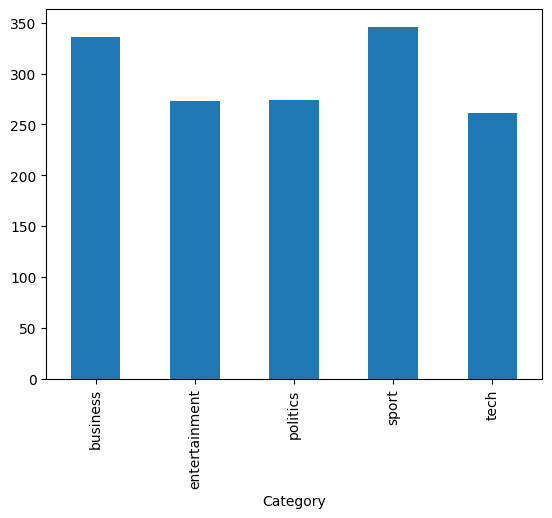

In [52]:
df.groupby('Category').category_id.count().plot.bar(ylim=0)


In [53]:
df

,ArticleId,Text,Category,#tokens,category_id
0,1833,worldcom ex-boss launches defence lawyers defe...,business,301,0
1,154,german business confidence slides german busin...,business,325,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,514,0
3,1976,lifestyle governs mobile choice faster bett...,tech,634,1
4,917,enron bosses in $168m payout eighteen former e...,business,355,0
...,...,...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment,223,4
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment,558,4
1487,1590,weak dollar hits reuters revenues at media gro...,business,237,0
1488,1587,apple ipod family expands market apple has exp...,tech,560,1
